In [1]:
# ANALYZING Dr. Martin Luther King Jr.'s I HAVE A DREAM SPEECH - Raw Sentimental Analysis
# By Symon Kimitei
# Aspiring Data Scientists
# Working only with lists and Dictionaries in sentimental analysis
#=====================================================================
# Import all the library dependencies 
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
# Import the data 
from wordcloud import WordCloud, STOPWORDS 
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image
from io import open

In [2]:
# Import the I have a dream speech as a textfile. This speech was delivered by Dr. Martin Luther King Jr. in 1963
dream = open("/Users/skimitei/Desktop/anaconda/dream.txt","r")


In [3]:
# Create an empty dictionary to store the keys(words) and Count of the frequency of unique words spoken by Dr. MLKJr
counts = dict() 

In [5]:
# Split the dream speech text into a list of words
words = dream.read().split()  
words=map(str, words)  ##strip unicode string from the list so that the word list do not begin with u


In [6]:
#Count and save the frequency of words under each key(word)
for word in words:
  counts[word]=counts.get(word,0)+1 # Count the frequency of unique words


print(dict(list(counts.items())[0:50])) # Print the first 51 items( (words(keys) and frequency of words) 
                                        # in the dictionary.


{'all': 7, 'smaller': 1, 'force': 1, 'pledge': 1, 'pass': 1, 'leads': 1, 'winds': 1, 'protest': 1, 'skin': 1, 'go': 8, 'children': 3, 'even': 2, 'whose': 1, 'what': 1, 'quicksands': 1, 'cells.': 1, 'honoring': 1, 'deeply': 1, 'sunlit': 1, 'to': 59, 'sweltering': 3, 'note,': 1, 'that:': 1, 'capital': 1, 'new': 2, 'fatal': 1, 'veterans': 1, 'Happiness."': 1, 'Tennessee.': 1, 'rise': 3, 'languished': 1, 'waters,': 1, 'sons': 2, 'every': 10, 'today!': 2, 'fall': 1, 'sing': 2, 'drinking': 1, 'today,': 3, 'vast': 1, 'No,': 1, 'highways': 1, 'Gentiles,': 1, 'America': 5, '--': 3, '"unalienable': 1, 'satisfied?"': 1, 'these': 1, 'Go': 1, 'vote.': 1}


In [7]:
# Convert the Count dictionary into a data frame.
dreamBigWords=pd.DataFrame.from_dict(counts, orient='index') 


In [8]:
# Name the first column as Count
dreamBigWords.columns=["Count"]

# Name the index column as Key (word)
dreamBigWords.index.names = ['Word'] 

In [12]:
# Subset the dreamBigWords data frame and save only words that had the greatest frequency in the speech
dreamBigWords = dreamBigWords[dreamBigWords.Count>= 20] 
dreamBigWords

,Count
Word,
the,101
of,99
to,59
and,41
a,37
be,33
will,27
that,23
is,23


In [11]:
# Sort the Count column in descending order
dreamBigWords = dreamBigWords.sort_values('Count',ascending=False)
dreamBigWords

,Count
Word,
the,101
of,99
to,59
and,41
a,37
be,33
will,27
that,23
is,23


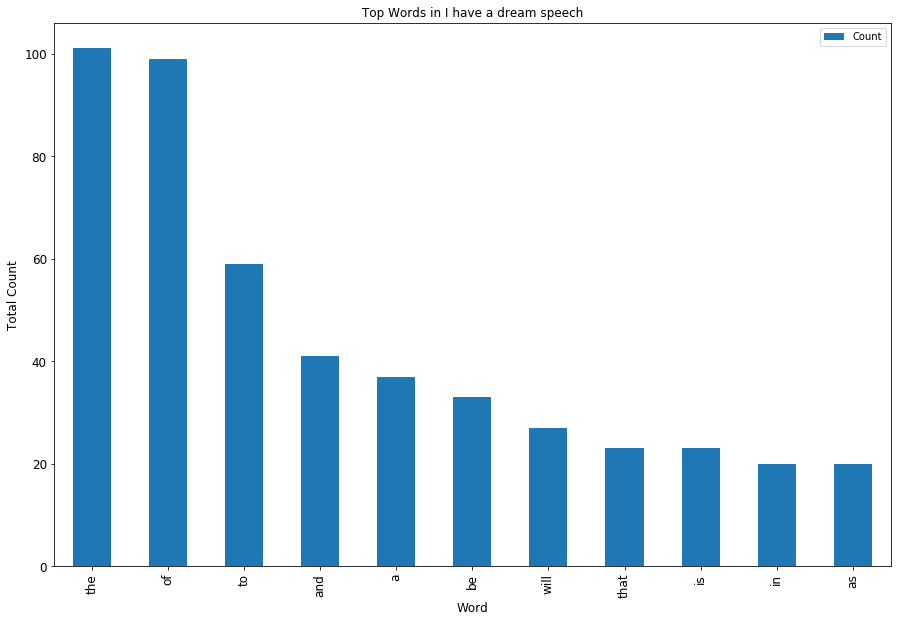

In [13]:
# Create a Bar graph of the major words as used by Dr. Martin Luther King Jr in his speech
ax = dreamBigWords['Count'].plot(kind='bar', title ="Top Words in I have a dream speech", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Word", fontsize=12)
ax.set_ylabel("Total Count", fontsize=12)
plt.show()

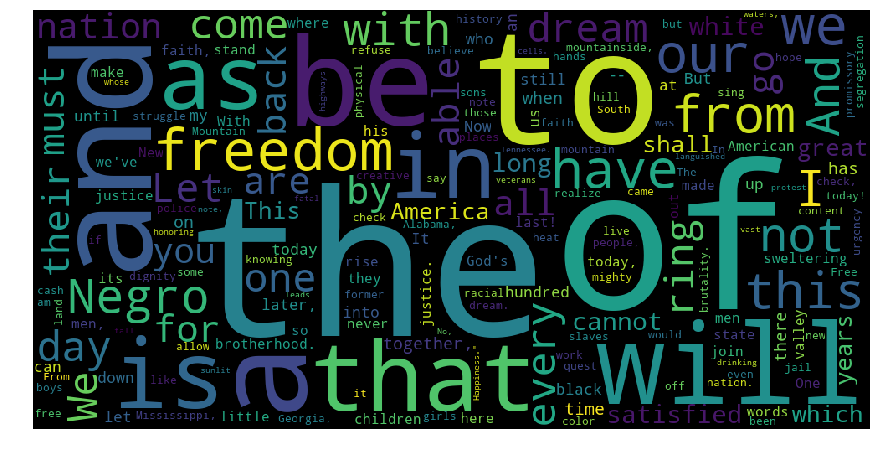

In [14]:
# Create a Word Cloud of the I have a dream speech

dream = open("/Users/skimitei/Desktop/anaconda/dream.txt","r")
counts = dict() # Create an empty dictionary

words = dream.read().split()  # Split the text into a list
words=map(str, words) #strip unicode string from the list so that the word list do not begin with u
#print(words)

#print('words:',words) # Print the list of words

#convert it to dictionary with values and its occurences
word_could_dict=Counter(words)

# print(word_could_dict) Print the word count dictionary
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('MLKJr.png', bbox_inches='tight')